### Introduction to Transfer Learning
***
**Table of Content**
1. What is Transfer Learning
2. Importance Behind Transfer Learning
3. How to Apply Transfer Learning

### 1. What is Transfer Learning
***
- Transfer Learning is the concept of taking a pretrained-model and applying to your own problems
- This concept applies mainly for deep learning models as they tend to require long periods of time to train
- Before we get into Transfer Learning, I am going to give a brief summary of how deep learning models learn

#### Weights and Biases
1. Mathemtical Symbols
   - Weights $W$
   - Biases $b$
   - Activation Function $a = f(WX + b)$
  
2. What are they?
   - Weights and biases are essentially the brains behind how a neural network thinks
   - They are trainable parameters that are tweaked after going the learning model goes through training
<br></br>

#### Neural Networks
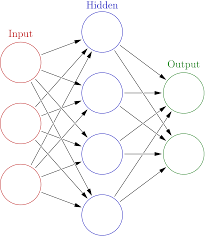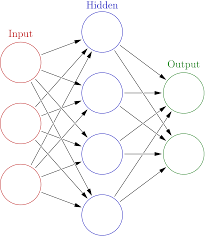
- An example of a small Neural Network
<br></br>

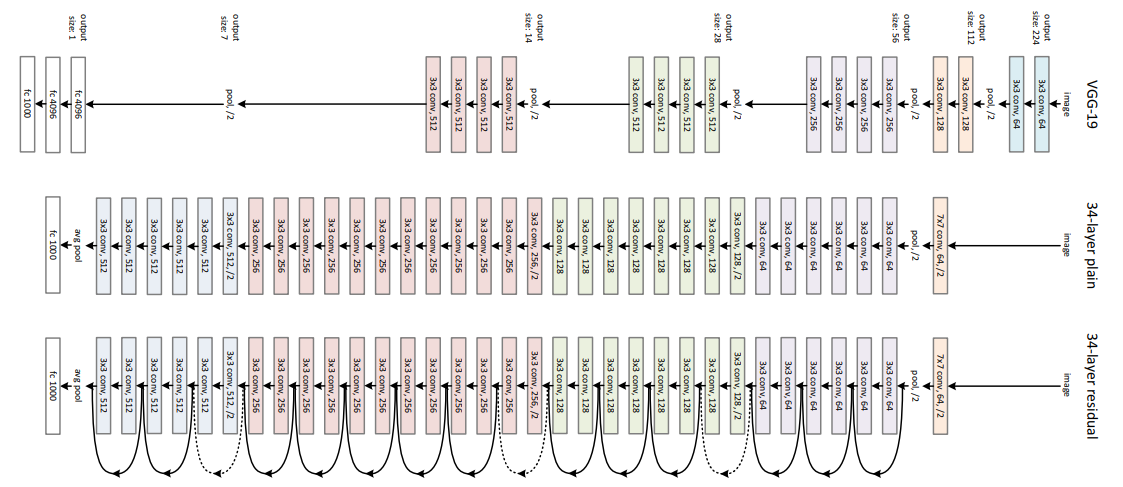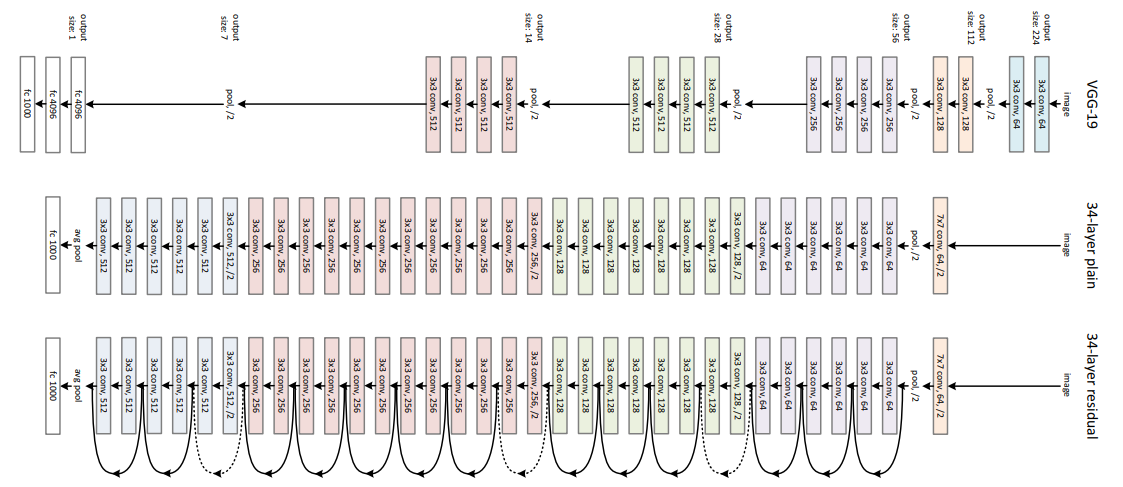
- Examples of large Convolutional Neural Network


#### 2. Importance Behind Transfer Learning
***
- `Time Effeciency`, and `Cost-Efficient ($)`
    - Reduces training time
    - Improves neural network performance (in most circumstances)
    - Great for Absence of a large amount of data.

- `Examples`
    - BusyBee Project :D (Trying out ResNet-50, and VGG-16)
    - Medical Image Detection Models (Tumors, Blood Diseases, Bone Deformality, etc.) Implements a transfer learning model of VGG-16
<br></br>

Sources: [Applications of Transfer Learning](https://hub.packtpub.com/5-cool-ways-transfer-learning-used-today/)

#### 3. How to Apply Transfer Learning
***
- Today we are going to go into a quick tutorial in PyTorch on how to load in pre-existing trained model and change it to apply for our case scenario

1. Classes that we are going to use
    - `torchvision`: A PyTorch library that has lots of vision models (CNNs, Object Detection, etc.)
    - `torch`: PyTorch
    - `torchinfo`: PyTorch library that illustrates a model's architecture
  
2. Process of Implementing Transfer Learning
    - Loading in pre-existing weights from a pre-trained model
    - Freezing Layers and Identifying Classification / Fully-Connected Layers
    - Creating our Own Fully-Connected Layers
    - Retraining our Fully Connected Layers Only or Retraining the Entire Model

   <br></br>
      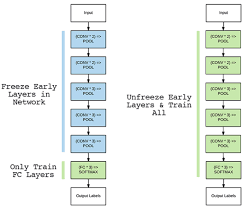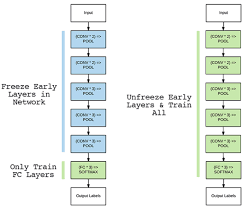


<br></br>

Sources: 
- [Transfer Learning Explained](https://builtin.com/data-science/transfer-learning)
- [PyTorch Tutorial on Transfer Learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/)

In [6]:
from torchvision import datasets, models, transforms
import torch
import torch.nn as nn
from torchinfo import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Use Nvidia GPU if available, for faster results

#### Instantiating our Model
***

In [7]:
# ResNet - 18
# ----------- #

res_net_18_weights = models.ResNet18_Weights.DEFAULT
res_net_18 = models.resnet18(weights=res_net_18_weights).to(device)
num_ftrs = res_net_18.fc.in_features

summary(model=res_net_18, 
              input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
              col_names=["input_size", "output_size", "num_params", "trainable"],
              col_width=20,
              row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   True
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     36,864               True
│    │    └─BatchN

#### Freezing Layers and Creating Our Own Classifier Layer
***

In [8]:
# Setting all our trainable layers to be non-trainable
for param in res_net_18.parameters():
    param.requires_grad = False

# Set only the fully-connected / classifier layer to be trainable
for param in res_net_18.fc.parameters():
    param.requires_grad = True

# Creating our fully connected layer and setting it into the ResNet18 Model
res_net_18.fc = nn.Sequential(
    nn.Linear(num_ftrs, 23)
).to(device)


# Illustrating Our new Model's Architect
summary(model=res_net_18, 
              input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
              col_names=["input_size", "output_size", "num_params", "trainable"],
              col_width=20,
              row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 23]             --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (36,864)             False
│    │    